# Welcome to image processing! (solution)
Mauricio Cerda, mauricio.cerda@uchile.cl

http://www.scian.cl

Data from Prof. Ulrike Kemmerling Lab (BeWo cell line)

Liempi et al (2015). Trypanosoma cruzi infectivity assessment in “in vitro” culture systems by automated cell counting. Acta Tropica, Volume 143, March 2015, Pages 47-50.
https://www.sciencedirect.com/science/article/abs/pii/S0001706X14003921

In [5]:
%pip install -U scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 2.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.8 MB/s eta 0:00:000:00:01m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


--2024-08-21 09:20:39--  https://sasiba.uchile.cl/index.php/s/zKzqsg2ZND7ZUQM/download
Resolving sasiba.uchile.cl (sasiba.uchile.cl)... 200.89.79.35
Connecting to sasiba.uchile.cl (sasiba.uchile.cl)|200.89.79.35|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 178448 (174K) [image/png]
Saving to: ‘chagas2.png’

chagas2.png         100%[===================>] 174.27K  --.-KB/s    in 0.06s   

2024-08-21 09:20:39 (2.88 MB/s) - ‘chagas2.png’ saved [178448/178448]



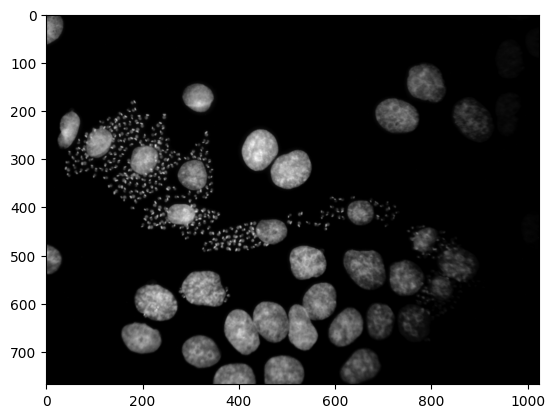

In [6]:
import numpy as np
from matplotlib.pyplot import imshow, subplot, plot
from  skimage import filters, morphology, io, img_as_uint, measure
import scipy.ndimage as snd

!wget --no-check-certificate  https://sasiba.uchile.cl/index.php/s/zKzqsg2ZND7ZUQM/download -O chagas2.png
image=io.imread('chagas2.png')
imshow(image, cmap='gray')

Pick a manual threshold value to segment the image

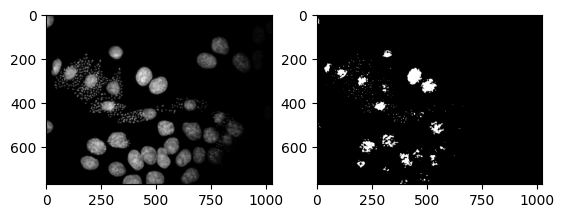

In [7]:
threshold=100

binary=image>threshold

subplot(1,2,1)
imshow(image, cmap='gray')
subplot(1,2,2)
imshow(binary, cmap='gray')

## (a) Pre-process using a convolution to improve segmentation

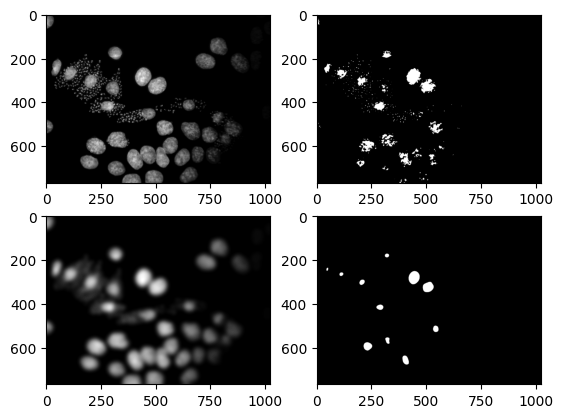

In [8]:
#Modify this code to improve segmentation by using a filter
#the filter could be gaussian or not

#example of how to do a general convolution
#k = np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
#filtered=snd.convolve(image, k)

filtered2=snd.gaussian_filter(image, 9)
binary2=filtered2>threshold

subplot(2,2,1)
imshow(image, cmap='gray')
subplot(2,2,2)
imshow(binary, cmap='gray')
subplot(2,2,3)
imshow(filtered2, cmap='gray')
subplot(2,2,4)
imshow(binary2, cmap='gray')

## (b) Clean out segmentation by using morphological filters

<ipython-input-4-0d9b02b75639>:1: DeprecationWarning: Please import `binary_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  dilated=snd.morphology.binary_dilation(binary2, iterations=8)


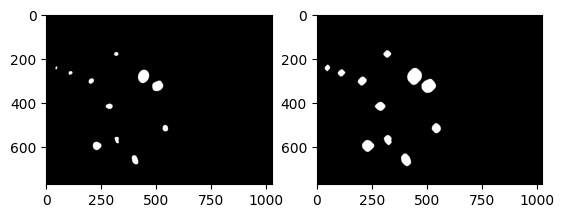

In [4]:
dilated=snd.morphology.binary_dilation(binary2, iterations=8)

subplot(1,2,1)
imshow(binary2, cmap='gray')
subplot(1,2,2)
imshow(dilated, cmap='gray')

## Exercise 1: Compute region properties and color each cell by size
## Exercise 2: Compute region properties and color each cell by elongation (optional)
## Exercise 3: Export results to a table (eg .csv) (optional)

In [13]:
np.unique(all_labels)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [15]:
properties

Number of objects=11


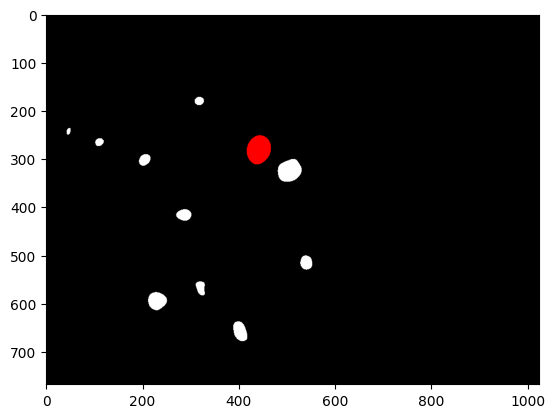

In [10]:
all_labels = measure.label(binary2, background=0)
properties = measure.regionprops(all_labels)
print( 'Number of objects=%s' % len(properties) )

# Make 3 channel RGB image same dimensions
RGB = np.zeros((binary2.shape[0],binary2.shape[1],3), dtype=np.uint8)

RGB[all_labels>0]  = [255,255,255]
RGB[all_labels==3]  = [255,0,0]
imshow(RGB)

#Hint: look at regionprops documentation
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

##Exercise 1: color by size (smaller -> brighter, bigger -> darker)

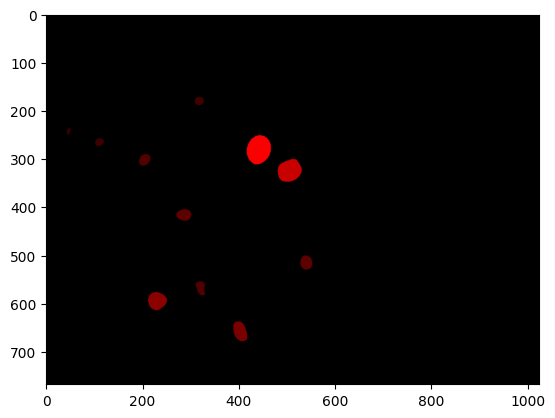

In [6]:
areas=[]
eccentricities=[]
#scale parameters
for prop in properties:
  areas.append(prop.area)
  eccentricities.append(prop.eccentricity)

minarea=min(areas)
maxarea=max(areas)

# Make 3 channel RGB image same dimensions
RGB = np.zeros((binary2.shape[0],binary2.shape[1],3), dtype=np.uint8)
RGB[all_labels>0]  = [255,255,255]

#color stack
for indx in range(1, 1+all_labels.max()):
  mask=all_labels==indx
  RGB[mask]=[50+200*(properties[indx-1].area-minarea)/(maxarea-minarea),0,0]

imshow(RGB)


##Exercise 2: color by elongation (rounded -> brighter, elliptical -> darker)

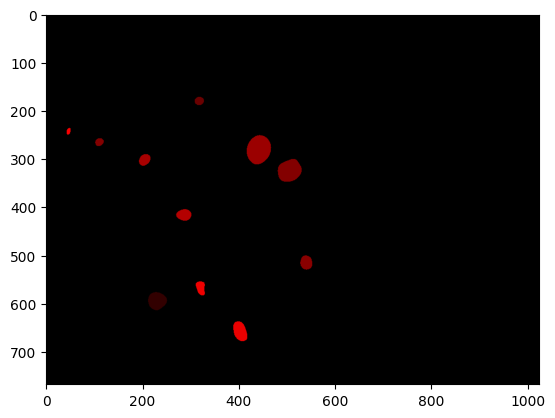

In [9]:
areas=[]
eccentricities=[]
#scale parameters
for prop in properties:
  areas.append(prop.area)
  eccentricities.append(prop.eccentricity)

minecc=min(eccentricities)
maxecc=max(eccentricities)

# Make 3 channel RGB image same dimensions
RGB = np.zeros((binary2.shape[0],binary2.shape[1],3), dtype=np.uint8)
RGB[all_labels>0]  = [255,255,255]

#color stack
for indx in range(1, 1+all_labels.max()):
  mask=all_labels==indx
  RGB[mask]=[50+200*(properties[indx-1].eccentricity-minecc)/(maxecc-minecc),0,0]

imshow(RGB)

##Exercise 3: export to table

In [12]:
import pandas as pd

props = measure.regionprops_table(all_labels, intensity_image=image,
                                  properties=('label','area','eccentricity'))

data = pd.DataFrame(props)
data.head()

data.to_csv('mysuperdata.csv')

##BONUS TRACK
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html

In [18]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

img = image
labels = measure.label(binary2)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip')  # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            name=label_i,
            mode='lines',
            fill='toself',
            showlegend=False,
            hovertemplate=hoverinfo,
            hoveron='points+fills',
        )
    )

plotly.io.show(fig)